1. In this part, you will obtain as much data as you can on the campaign contributions received by each candidate. This data is avaiable through the website https://www.opensecrets.org/. At the end of the project, your group will give a presentation of your findings.

Start by scraping the data from the summary page for Tennessee's 2nd District, which is available at https://www.opensecrets.org/races/summary?cycle=2020&id=TN02&spec=N.
The data that we want is contained in the "Total Raised and Spent" table.
Make a DataFrame showing, for each candidate:
the candidate's name
the candidate's party
state
district number
whether the candidate was an incumbent
whether the candidate won the race
the total amount raised by that candidate (as a numeric variable)
the total amount spent by the candidate (as a numeric variable)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import re 

In [2]:
URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN02&spec=N'
response = requests.get(URL)
type(response)
response.status_code
#response.text
soup = BS(response.text)
#print(soup.prettify())


In [3]:
#found the table type in print(soup.prettify):
 #<table class="DataTable">
soup.find('table', attrs={'class' : 'DataTable'}) # does not need attr (but being more specific is helpful in attr)
table_html = str(soup.find('table', attrs={'class' : 'DataTable'}))
#just to show the table, not to interact with it yet
HTML(table_html)

Candidate,Raised,Spent,Cash on Hand,Last Report
Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020
Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020


In [4]:
#interact with the table
pd.read_html(str(soup.find('table', attrs={'class' : 'DataTable'})))[0] #first table

,Candidate,Raised,Spent,Cash on Hand,Last Report
0,Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020
1,Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020


2. Once you have working code for Tennessee's 2nd District, expand on your code to capture all of Tennessee's districts.

In [5]:
URL = 'https://www.factmonster.com/us/postal-information/state-abbreviations-and-state-postal-codes'
response = requests.get(URL)
type(response)
response.status_code
#response.text
soup = BS(response.text)
#print(soup.prettify())

In [6]:
#now find a list of the states and turn it into a DF
soup.find('table')
table_html = str(soup.find('table'))
#just to show the table, not to interact with it yet
HTML(table_html)


State/District,Abbreviation,Postal Code
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA
Colorado,Colo.,CO
Connecticut,Conn.,CT
Delaware,Del.,DE
District of Columbia,D.C.,DC
Florida,Fla.,FL


In [7]:
#interact with the table
states_list = pd.read_html(str(soup.find('table')))[0] #first table
states_list = states_list.rename(columns = {'State/District' : 'state'})
states_list.head(2)

,state,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK


now, find the list of the states with their districts from https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120
...and turn the table into a DF


In [8]:
URL = 'https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120'
response = requests.get(URL)
type(response)
response.status_code
#response.text
soup = BS(response.text)
#print(soup.prettify())
soup.find('table')
table_html = str(soup.find('table'))
#just to show the table, not to interact with it yet
HTML(table_html)

state,representatives
Alabama,7
Alaska,1
Arizona,9
Arkansas,4
California,53
Colorado,7
Connecticut,5
Delaware,1
Florida,27
Georgia,14


In [9]:
states_list.head(2)

,state,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK


In [10]:
#interact with the table
district_numbers = pd.read_html(str(soup.find('table')))[0] #first table
district_numbers.head(2)

,state,representatives
0,Alabama,7
1,Alaska,1


In [11]:
#merge the states_list and district_numbers
states_and_districts = pd.merge(states_list, district_numbers)
states_and_districts.head(10)

,state,Abbreviation,Postal Code,representatives
0,Alabama,Ala.,AL,7
1,Alaska,Alaska,AK,1
2,Arizona,Ariz.,AZ,9
3,Arkansas,Ark.,AR,4
4,California,Calif.,CA,53
5,Colorado,Colo.,CO,7
6,Connecticut,Conn.,CT,5
7,Delaware,Del.,DE,1
8,Florida,Fla.,FL,27
9,Georgia,Ga.,GA,14


In [12]:
#change the column name for future use
states_and_districts = states_and_districts.rename(columns = {'Postal Code': 'state_abbr'}) #state abbreviation
states_and_districts.head(10)

,state,Abbreviation,state_abbr,representatives
0,Alabama,Ala.,AL,7
1,Alaska,Alaska,AK,1
2,Arizona,Ariz.,AZ,9
3,Arkansas,Ark.,AR,4
4,California,Calif.,CA,53
5,Colorado,Colo.,CO,7
6,Connecticut,Conn.,CT,5
7,Delaware,Del.,DE,1
8,Florida,Fla.,FL,27
9,Georgia,Ga.,GA,14


In [13]:
TN_state = states_and_districts[states_and_districts['state_abbr'] == 'TN']
TN_state

,state,Abbreviation,state_abbr,representatives
41,Tennessee,Tenn.,TN,9


In [14]:
#base url to which nine of two digit numbers are to be added for pulling the first table from each
URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN'

#create a list of district codes
district_codes = []
for district in range(1, int(TN_state['representatives']) + 1): #+1 includes the last district as well
    if district < 10:
        district_codes.append('0'+ str(district)) #otherwise 0+9 = 9 if treating as digits
    else:
        district_codes.append(str(district)) 
print(district_codes)

#create a list of URLs
URL_list = []
#apped district codes to URL list items
for code in district_codes:
    URL_list.append(URL + code)
print(URL_list)


#pull out each table data and add each to a list containing all tables
table_list = []
for URL in URL_list:
    response = requests.get(URL)
    soup = BS(response.text)
    TN_table = pd.read_html(str(soup.find('table', attrs = {'class' : 'DataTable'})))[0]
    table_list.append(TN_table)
table_list

['01', '02', '03', '04', '05', '06', '07', '08', '09']
['https://www.opensecrets.org/races/summary?cycle=2020&id=TN01', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN02', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN03', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN04', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN05', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN06', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN07', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN08', 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN09']


[                         Candidate      Raised       Spent Cash on Hand  \
 0  Diana Harshbarger (R)  • Winner  $2,126,946  $1,869,100     $257,846   
 1      Blair Nicole Walsingham (D)    $140,209    $134,995       $5,215   
 
   Last Report  
 0  12/31/2020  
 1  10/14/2020  ,
                                 Candidate      Raised     Spent Cash on Hand  \
 0  Tim Burchett (R)  • Incumbent • Winner  $1,336,276  $878,488     $593,678   
 1                         Renee Hoyos (D)    $812,784  $816,793         $210   
 
   Last Report  
 0  12/31/2020  
 1  12/31/2020  ,
                                      Candidate      Raised     Spent  \
 0  Chuck Fleischmann (R)  • Incumbent • Winner  $1,051,653  $381,411   
 1                               Meg Gorman (D)     $85,843   $77,760   
 
   Cash on Hand Last Report  
 0   $1,880,341  12/31/2020  
 1       $8,083  12/31/2020  ,
                                     Candidate    Raised     Spent  \
 0  Scott Desjarlais (R)  • Incumbent •

In [15]:
base_table = table_list.pop(0)
base_table

,Candidate,Raised,Spent,Cash on Hand,Last Report
0,Diana Harshbarger (R) • Winner,"$2,126,946","$1,869,100","$257,846",12/31/2020
1,Blair Nicole Walsingham (D),"$140,209","$134,995","$5,215",10/14/2020


In [16]:
#concatenate all the tables (each is a DF) 
# concat is used for when the values for the columns are different. merge needs similar values
for table in table_list:
    all_TN_tables = pd.concat([base_table, table])
all_TN_tables

,Candidate,Raised,Spent,Cash on Hand,Last Report
0,Diana Harshbarger (R) • Winner,"$2,126,946","$1,869,100","$257,846",12/31/2020
1,Blair Nicole Walsingham (D),"$140,209","$134,995","$5,215",10/14/2020
0,Steve Cohen (D) • Incumbent • Winner,"$607,570","$457,311","$1,216,119",12/31/2020
1,Charlotte Bergmann (R),"$99,147","$100,532","$2,566",12/31/2020
2,Dennis Clark (I),"$9,991","$9,919",$40,11/23/2020


3. Once you have working code for all of Tennessee's districts, expand on it to capture all states and districts. The number of representatives each state has can be found in a table on this page: https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120

In [17]:
states_and_districts.head()

,state,Abbreviation,state_abbr,representatives
0,Alabama,Ala.,AL,7
1,Alaska,Alaska,AK,1
2,Arizona,Ariz.,AZ,9
3,Arkansas,Ark.,AR,4
4,California,Calif.,CA,53


In [18]:
#base url for all states (lacks state abbr and hte district codes)

#each row is related to a state
district_codes = {} #put here, not after for loop so it does not empty after each iteration
for index, row in states_and_districts.iterrows(): #iterrow gives a tuple of index and row content
    district_codes[row[2]] = []
    for district in range(1, int(row[3])+1): 
        if district < 10:
            district_codes[row[2]].append(row[2] + '0' + str(district))
        else:
            district_codes[row[2]].append(row[2] + str(district)) 
#print(district_codes) # a dict 

In [19]:
URL_list = []
for key, item in district_codes.items(): 
  for value in item:
    #print(value)
    URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=' #not corrupted here
    #print(URL)
    URL_list.append(URL + value) #URL here is not fresh anymore! So I bring it inside
    #print(URL)
#print(URL_list)

In [20]:
table_list = []
for URL in URL_list:
    response = requests.get(URL)
    soup = BS(response.text)
    state_table = pd.read_html(str(soup.find('table', attrs = {'class' : 'DataTable'})))[0] #make DF
    state_table['state_info'] = URL[-4:]
   
    table_list.append(state_table)
#print(table_list)
#print(table_list)
#output: tables (DFs) for all URLs that need to be concatinated. district_codes

In [21]:
# concatination needs a base DF:  
base_table= table_list.pop(0)
for table in table_list:
     base_table = pd.concat([base_table, table])
#print(base_table)


In [22]:
base_table = base_table.reset_index(drop = True)
#base_table = base_table.assign(Name = '', Party = '', Winner = '', Incumbent = '')
base_table.head(2)

,Candidate,Raised,Spent,Cash on Hand,Last Report,state_info
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,AL01
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,AL01


In [23]:
URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=DC00'
response = requests.get(URL)
type(response)
response.status_code
soup = BS(response.text)
soup.find('table')
table_html = str(soup.find('table'))
dc_table = pd.read_html(str(soup.find('table')))[0]
#create columns and values for them
dc_table['state_info'] = 'DC00'
dc_table

,Candidate,Raised,Spent,Cash on Hand,Last Report,state_info
0,Eleanor Holmes Norton (D) • Incumbent • Winner,"$386,989","$358,925","$97,629",12/31/2020,DC00
1,Barbara Washington Franklin (I),"$14,070","$16,530",$0,12/31/2020,DC00
2,David Krucoff (I),"$12,133","$12,069",$22,12/31/2020,DC00


In [24]:
base_table = pd.concat([base_table, dc_table])
base_table.head(100)

,Candidate,Raised,Spent,Cash on Hand,Last Report,state_info
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,AL01
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,AL01
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,AL02
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,AL02
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,AL03
...,...,...,...,...,...,...
95,Pete Aguilar (D) • Incumbent • Winner,"$2,475,748","$1,861,434","$1,839,594",12/31/2020,CA31
96,Agnes Gibboney (R),"$138,687","$127,907","$10,780",12/31/2020,CA31
97,Grace Napolitano (D) • Incumbent • Winner,"$478,426","$251,047","$533,330",12/31/2020,CA32
98,Joshua Scott (R),"$23,624","$14,248","$10,155",12/31/2020,CA32


In [25]:
#clean the dataframe
base_table['winner'] = base_table['Candidate'].str.extract('([wW]inner)')
base_table['winner'] = base_table['winner'].replace('([wW]inner)', 'True', regex = True)
base_table['winner']= base_table['winner'].fillna('False')
base_table['party'] = base_table['Candidate'].str.extract('\((\w)\)')
base_table['incumbent'] = base_table['Candidate'].str.extract('(incumbent)', flags = re.I)
base_table['incumbent'] = base_table['incumbent'].replace('Incumbent', 'True')
base_table['incumbent']= base_table['incumbent'].fillna('False')
base_table['name'] = base_table['Candidate'].str.extract('(.+)\(')
base_table['state-district'] = base_table['state_info'].str.extract('(\d{2})')
base_table['state-district'].astype(int)
base_table['state-code'] = base_table['state_info'].str.extract('(\D{2})')
base_table[['Raised', 'Spent', 'Cash on Hand']] = base_table[['Raised', 'Spent', 'Cash on Hand']].replace('[\$,]', '', regex = True).astype(int)
base_table['Last Report'] = pd.to_datetime(base_table['Last Report'])
base_table.drop(columns = ['state_info'])
final_table = base_table[['name', 'state-code', 'state-district', 'winner', 'party', 'incumbent', 'Raised', 'Spent', 'Cash on Hand', 'Last Report']]


final_table

,name,state-code,state-district,winner,party,incumbent,Raised,Spent,Cash on Hand,Last Report
0,Jerry Carl,AL,01,True,R,False,1971321,1859349,111973,2020-12-31
1,James Averhart,AL,01,False,D,False,80095,78973,1122,2020-12-31
2,Barry Moore,AL,02,True,R,False,650807,669368,-13633,2020-12-31
3,Phyllis Harvey-Hall,AL,02,False,D,False,56050,55988,0,2020-12-31
4,Mike D Rogers,AL,03,True,R,True,1193111,1218564,502234,2020-12-31
...,...,...,...,...,...,...,...,...,...,...
892,Liz Cheney,WY,01,True,R,True,3003883,3060167,153567,2020-12-31
893,Lynnette Grey Bull,WY,01,False,D,False,134597,132235,2363,2020-12-31
0,Eleanor Holmes Norton,DC,00,True,D,True,386989,358925,97629,2020-12-31
1,Barbara Washington Franklin,DC,00,False,I,False,14070,16530,0,2020-12-31


In [26]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 2
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            897 non-null    object        
 1   state-code      897 non-null    object        
 2   state-district  897 non-null    object        
 3   winner          897 non-null    object        
 4   party           897 non-null    object        
 5   incumbent       897 non-null    object        
 6   Raised          897 non-null    int64         
 7   Spent           897 non-null    int64         
 8   Cash on Hand    897 non-null    int64         
 9   Last Report     897 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 77.1+ KB


In [27]:
final_table.to_csv('all_tables', index = False)
final_table = pd.read_csv('all_tables')
final_table

,name,state-code,state-district,winner,party,incumbent,Raised,Spent,Cash on Hand,Last Report
0,Jerry Carl,AL,1,True,R,False,1971321,1859349,111973,2020-12-31
1,James Averhart,AL,1,False,D,False,80095,78973,1122,2020-12-31
2,Barry Moore,AL,2,True,R,False,650807,669368,-13633,2020-12-31
3,Phyllis Harvey-Hall,AL,2,False,D,False,56050,55988,0,2020-12-31
4,Mike D Rogers,AL,3,True,R,True,1193111,1218564,502234,2020-12-31
...,...,...,...,...,...,...,...,...,...,...
892,Liz Cheney,WY,1,True,R,True,3003883,3060167,153567,2020-12-31
893,Lynnette Grey Bull,WY,1,False,D,False,134597,132235,2363,2020-12-31
894,Eleanor Holmes Norton,DC,0,True,D,True,386989,358925,97629,2020-12-31
895,Barbara Washington Franklin,DC,0,False,I,False,14070,16530,0,2020-12-31


4. Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:


a. How often does the candidate who raised more money win a race?

In [28]:
#total amount raised
print(final_table['Raised'].sum())
#Which party won more often
print(final_table.groupby('winner')['party'].value_counts())

1668258714
winner  party
False   D        203
        R        178
        I         48
        L         21
        3         15
True    D        222
        R        210
Name: party, dtype: int64


b. How often does the candidate who spent more money win a race?

<AxesSubplot:xlabel='party'>

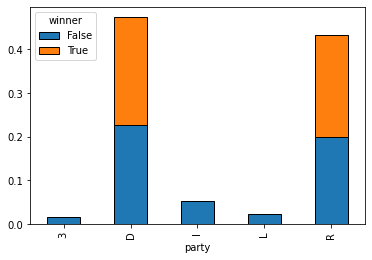

In [29]:
#winner percentage in each party
pd.crosstab(final_table['party'], final_table['winner'], normalize = True).plot(kind = 'bar', edgecolor = 'black', stacked = True )

In [37]:
#separate year in a column
final_table['year'] = final_table['Last Report'].str.extract('(\d{4})-')
final_table

,name,state-code,state-district,winner,party,incumbent,Raised,Spent,Cash on Hand,Last Report,year
0,Jerry Carl,AL,1,True,R,False,1971321,1859349,111973,2020-12-31,2020
1,James Averhart,AL,1,False,D,False,80095,78973,1122,2020-12-31,2020
2,Barry Moore,AL,2,True,R,False,650807,669368,-13633,2020-12-31,2020
3,Phyllis Harvey-Hall,AL,2,False,D,False,56050,55988,0,2020-12-31,2020
4,Mike D Rogers,AL,3,True,R,True,1193111,1218564,502234,2020-12-31,2020
...,...,...,...,...,...,...,...,...,...,...,...
892,Liz Cheney,WY,1,True,R,True,3003883,3060167,153567,2020-12-31,2020
893,Lynnette Grey Bull,WY,1,False,D,False,134597,132235,2363,2020-12-31,2020
894,Eleanor Holmes Norton,DC,0,True,D,True,386989,358925,97629,2020-12-31,2020
895,Barbara Washington Franklin,DC,0,False,I,False,14070,16530,0,2020-12-31,2020


/var/folders/cl/6732l4td4930rpqrp4rpmpt80000gn/T/ipykernel_35232/1987805576.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_table.groupby('state-code')['Raised', 'Spent'].mean().sort_values(by = 'Raised').plot(kind = 'bar', figsize = (20, 5))


<AxesSubplot:xlabel='state-code'>

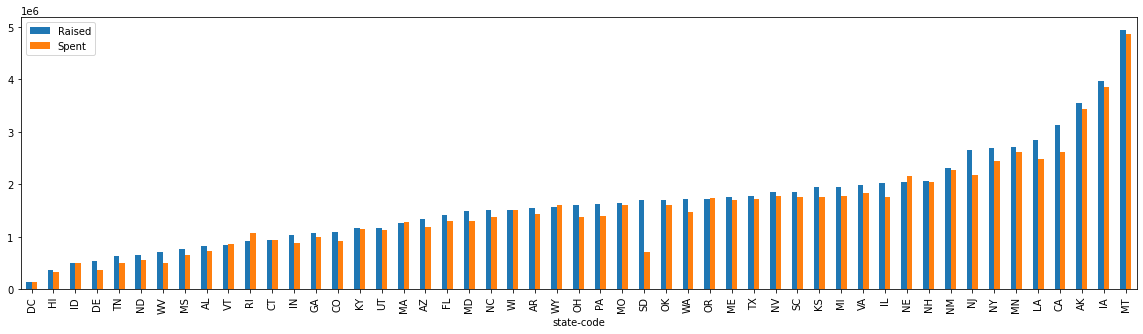

In [212]:
# Raised and Spend per state
final_table.groupby('state-code')['Raised', 'Spent'].mean().sort_values(by = 'Raised').plot(kind = 'bar', figsize = (20, 5))



c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?

            Raised       Spent
winner                        
False    494647211   487719523
True    1173611503  1018321195


/var/folders/cl/6732l4td4930rpqrp4rpmpt80000gn/T/ipykernel_35232/4252094151.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  money_by_winner = final_table.groupby('winner')['Raised', 'Spent'].agg(sum)


<AxesSubplot:xlabel='winner'>

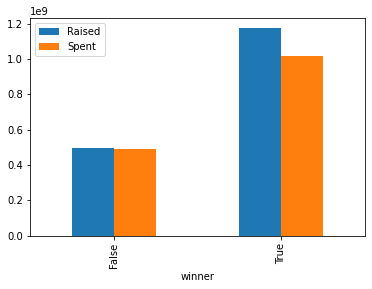

In [200]:
money_by_winner = final_table.groupby('winner')['Raised', 'Spent'].agg(sum)
print(money_by_winner)
money_by_winner.plot(kind = 'bar')

d. How often does the incumbent candidate win a race?

In [261]:
final_table.groupby('winner')['incumbent'].value_counts(normalize= True)

winner  incumbent
False   False        0.967742
        True         0.032258
True    True         0.861111
        False        0.138889
Name: incumbent, dtype: float64

In [258]:
final_table.groupby('incumbent')['winner'].value_counts(normalize= True)

incumbent  winner
False      False     0.882353
           True      0.117647
True       True      0.961240
           False     0.038760
Name: winner, dtype: float64

Text(0.5, 1.0, 'money raised, spent, and incumbent status')

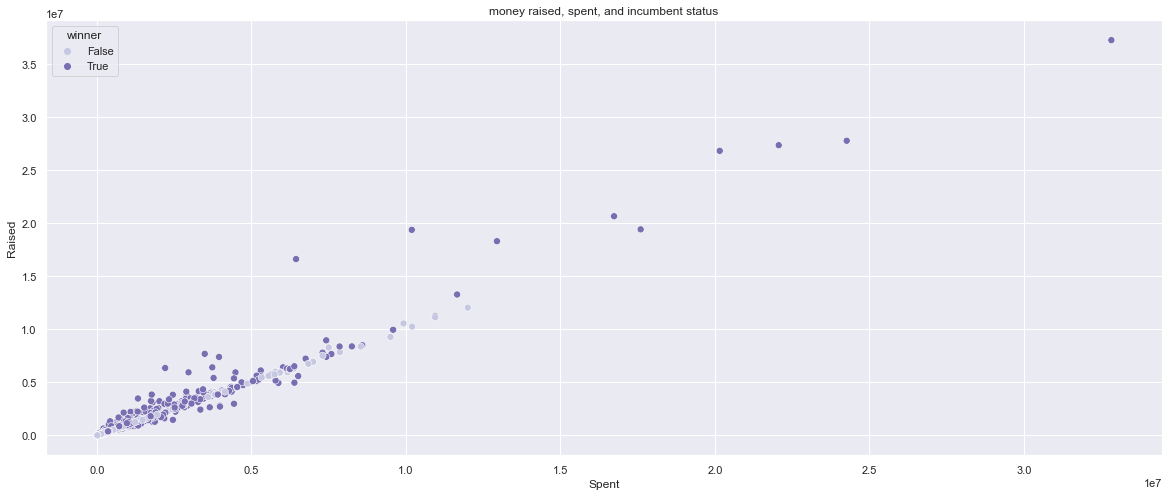

In [252]:

sns.set(rc = {'figure.figsize':(20,8)})
sns.scatterplot(x = final_table['Spent'], y = final_table['Raised'], hue = final_table['winner'], palette = 'Purples', s = 50)
plt.title('money raised, spent, and incumbent status')


e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [203]:
final_table.groupby('incumbent')[['Raised']].sum()

,Raised
incumbent,
False,578799155
True,1089459559


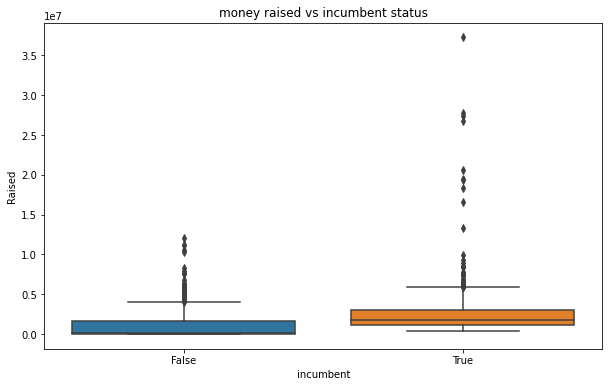

In [213]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.boxplot(data = final_table, x = 'incumbent', y = 'Raised')
plt.title('money raised vs incumbent status');

<AxesSubplot:xlabel='name'>

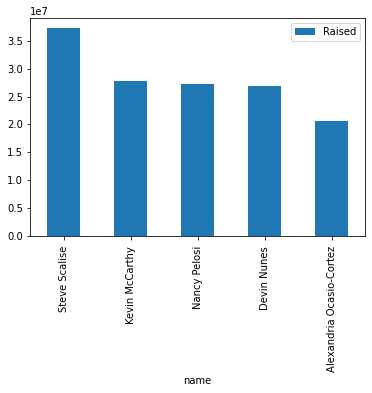

In [188]:
#top 5 fund raisers
high= final_table.nlargest(5, 'Raised')
high.plot(kind = 'bar', x = 'name', y = 'Raised')

In [281]:
#top fund raisers: sorted
final_table.groupby(['name','state-code', 'state-district']).max().sort_values('Raised', ascending= False)

,,,winner,party,incumbent,Raised,Spent,Cash on Hand,Last Report,year
name,state-code,state-district,,,,,,,,
Steve Scalise,LA,1,True,R,True,37262827,32830607,6217720,2020-12-31,2020
Kevin McCarthy,CA,23,True,R,True,27780644,24265583,4802133,2020-12-31,2020
Nancy Pelosi,CA,12,True,D,True,27359508,22064953,6299373,2020-12-31,2020
Devin Nunes,CA,22,True,R,True,26825212,20156093,10908033,2020-12-31,2020
Alexandria Ocasio-Cortez,NY,14,True,D,True,20664795,16735422,4297383,2020-12-31,2020
...,...,...,...,...,...,...,...,...,...,...
Joshua Sauberman,NY,3,False,I,False,127,270,-2258,2020-12-31,2020
Amit Lal,NY,5,False,I,False,126,0,126,2020-11-16,2020
Michael David Sanchez,TX,14,False,I,False,100,12,88,2020-09-30,2020
